Zbiór: https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

Celem projektu jest przewidywanie chorób wątroby na podstawie podanych danych.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Przetwarzanie danych</h1>

In [4]:
data = pd.read_csv('indian_liver_patient.csv')
data.head()



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Płeć jest jedyną nienumeryczną kolumną. Zamieńmy to: 1 - male, 0 - female

In [6]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='Male' else 0)

Kolumna "Dataset" oznacza obecność choroby wątroby (1 - obecność choroby, 2 - brak). Dla jasności nazwijmy ją inaczej:

In [13]:
data.rename(columns = {'Dataset': 'Liver_disease'}, inplace=True)



In [8]:
# Sprawdzenie czy są jakieś nulle
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_disease                 0
dtype: int64

Jedyną kolumną posiadającą null jest Albumin_and_Globulin_Ratio. Poszukajmy zależności między danymi i sprawdźmy czy wszystkie kolumny są potrzebne.

Liczba zdiagnozowanych chorych:  416
Liczba zdrowych:  167


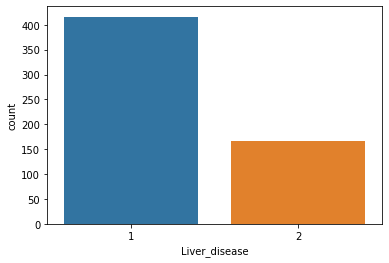

In [9]:
sns.countplot(data = data, x = 'Liver_disease', label='Count')

d, nd = data['Liver_disease'].value_counts()
print('Liczba zdiagnozowanych chorych: ', d)
print('Liczba zdrowych: ', nd)

<AxesSubplot:>

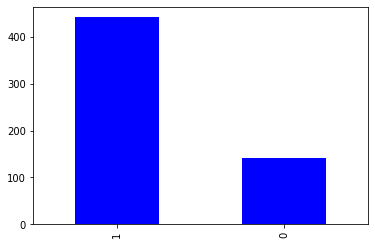

In [10]:
data['Gender'].value_counts().plot.bar(color='blue')


Widzimy że w danych znajduje się znacznie więcej mężczyzn niż kobiet. Sprawdźmy wiek grupy pacjentów:

<AxesSubplot:>

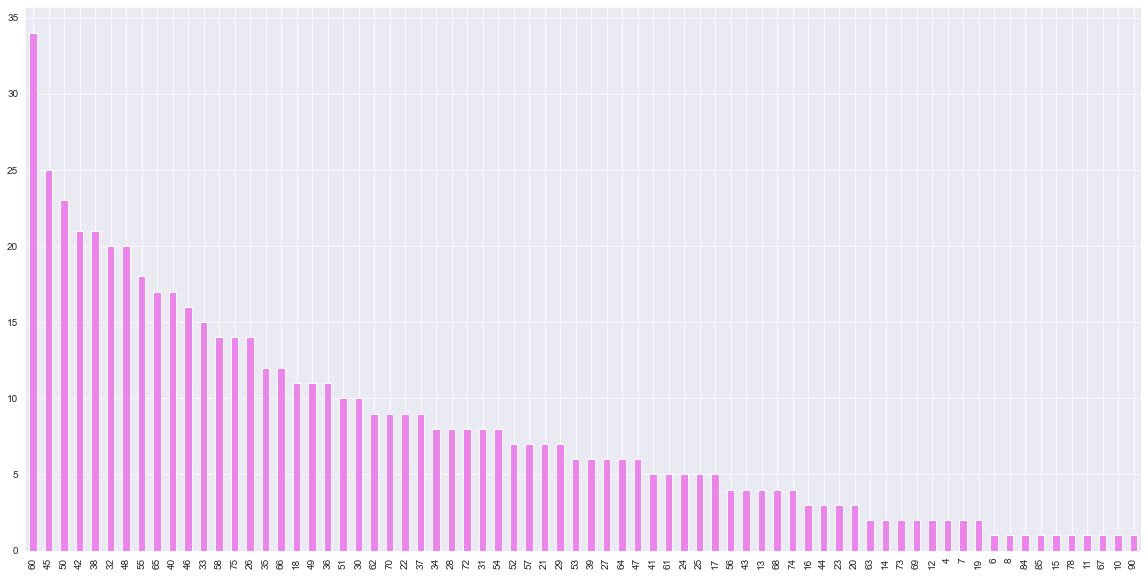

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
data['Age'].value_counts().plot.bar(color='violet')

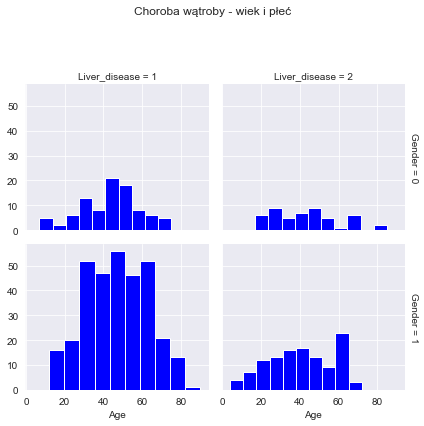

In [10]:
grid = sns.FacetGrid(data, col="Liver_disease", row="Gender", margin_titles=True)
grid.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.8)
grid.fig.suptitle('Choroba wątroby - wiek i płeć');

Wiek wydaje się być znaczący dla mężczyzn i kobiet

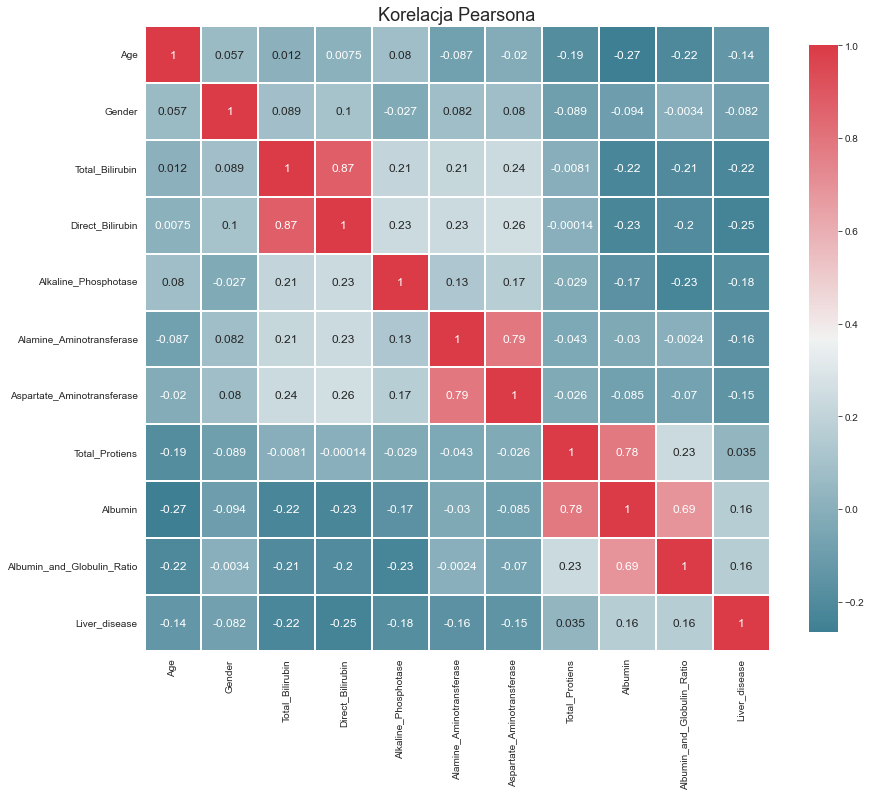

In [11]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Korelacja Pearsona', y=1, size=18)

correlation_heatmap(data)

Widać, że niektóre z kolumn są zależne od siebie liniowo.

c:\Users\idles\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


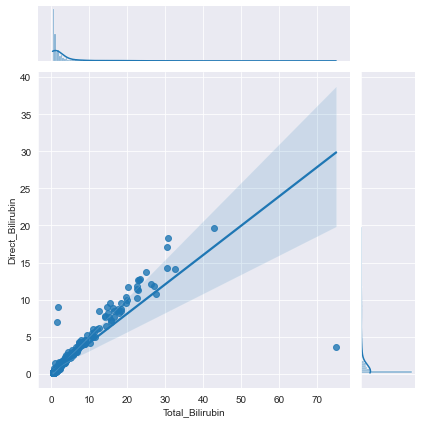

In [12]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=data, kind="reg")


c:\Users\idles\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


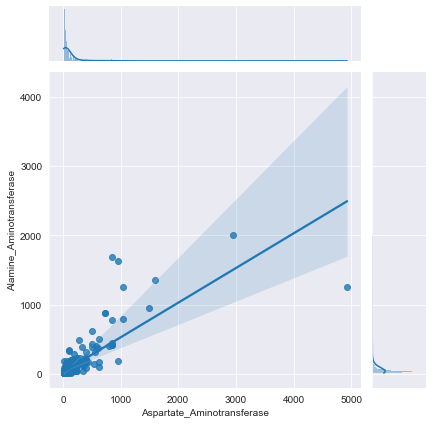

In [13]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=data, kind="reg")

c:\Users\idles\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


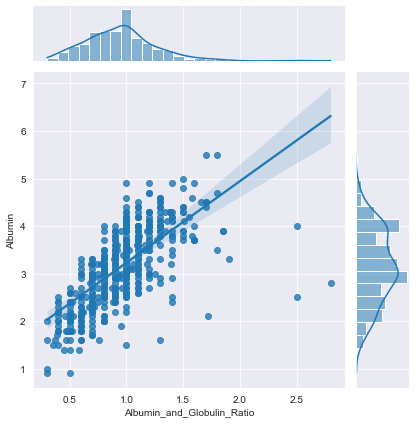

In [14]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=data, kind="reg")

Zależne liniowo od siebie są między innymi
Albumin_and_Globulin_Ratio i Albumin, 
Aspartate_Aminotransferase i Alamine_Aminotransferase, 
Total_Bilirubin i Direct_Bilirubin, 

Usuńmy Albumin_and_Globulin_Ratio, Alamine_Aminotransferase oraz Total_Bilirubin, tym samym pozbywając się wszystkich wierszy z nullami:

In [11]:
data.drop("Albumin_and_Globulin_Ratio", inplace=True, axis=1)
data.drop("Alamine_Aminotransferase", inplace=True, axis=1)
data.drop("Total_Bilirubin", inplace=True, axis=1)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    object 
 10  Liver_disease               583 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 50.2+ KB


In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Liver_disease                 0
dtype: int64

<AxesSubplot:xlabel='Liver_disease', ylabel='Albumin'>

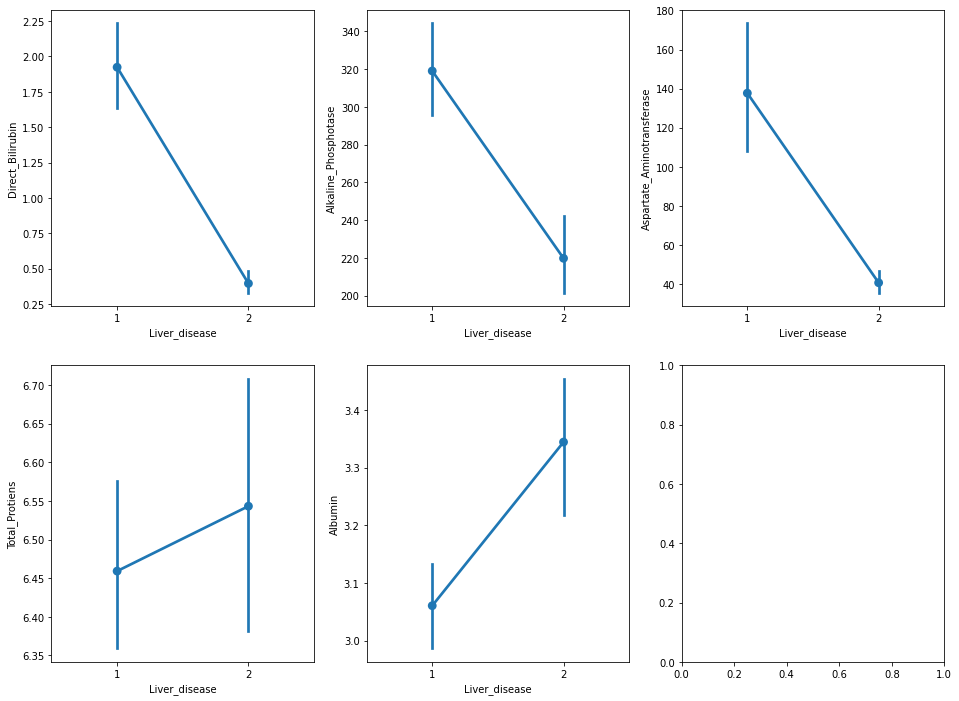

In [10]:
fig, saxis = plt.subplots(2, 3, figsize=(16,12))

sns.pointplot(y = 'Direct_Bilirubin', x = 'Liver_disease', data=data, ax = saxis[0, 0])
sns.pointplot(y = 'Alkaline_Phosphotase', x = 'Liver_disease', data=data, ax = saxis[0,1])
sns.pointplot(y = 'Aspartate_Aminotransferase', x = 'Liver_disease', data=data, ax = saxis[0, 2])
sns.pointplot(y = 'Total_Protiens', x = 'Liver_disease', data=data, ax = saxis[1, 0])
sns.pointplot(y = 'Albumin', x = 'Liver_disease', data=data, ax = saxis[1, 1])


Widzimy, że wystarczy chociaż jedna z danych wychodząca poza "normę" żeby znacznie zwiększyć szansę na zachorowanie. Zawyżony Direct_Bilirubin, Alkaline_Phosphotase, Aspartate_Aminotransferase lub zaniżone Total_Proteins czy Albumin mają ogromne znaczenie.

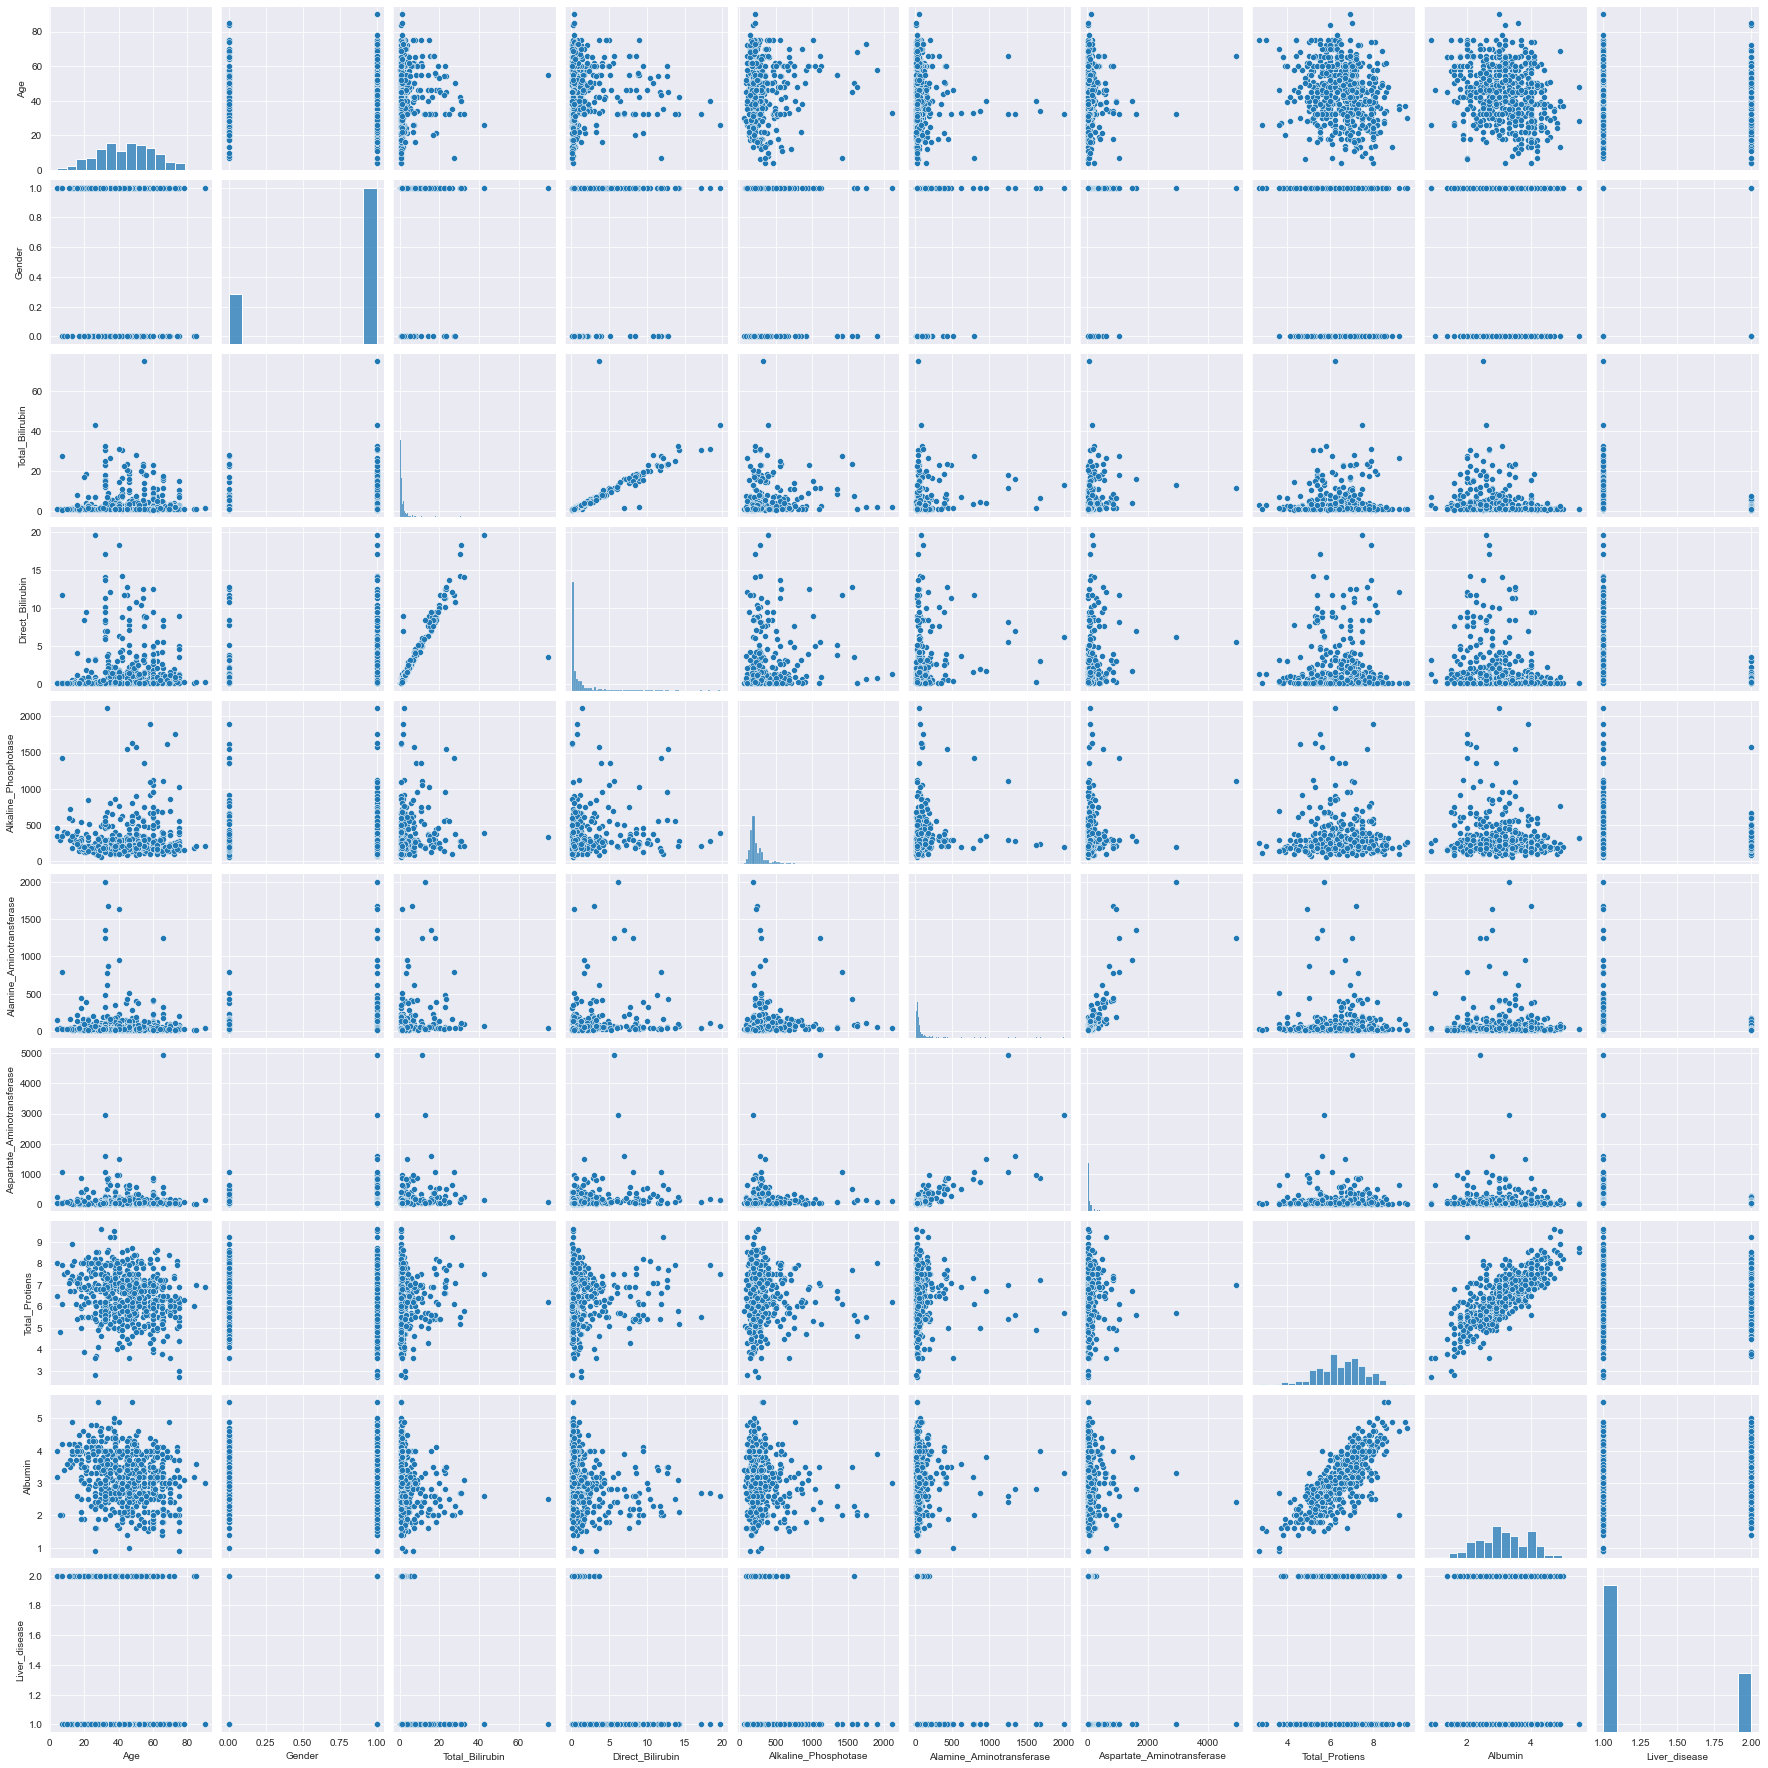

In [19]:
sns.pairplot(data)
plt.show()

<h1>Modelowanie</h1>

Dzielimy dane na treningowe i testowe

In [16]:
from sklearn.model_selection import train_test_split

# df_sex = pd.get_dummies(data['Gender'])
# df_new = pd.concat([data, df_sex], axis=1)
# Droop_gender = df_new.drop(labels=['Gender'],axis=1 )
# Droop_gender.columns = ['Age', 'Direct_Bilirubin','Alkaline_Phosphotase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Male','Fmale','Liver_disease']

# X = Droop_gender.drop('Liver_disease', axis=1)
# y = Droop_gender['Liver_disease']

X = data[['Age', 'Direct_Bilirubin','Alkaline_Phosphotase','Aspartate_Aminotransferase','Total_Protiens','Albumin', 'Gender']]

y = data['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# compile ANN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the data
history =classifier.fit(X_train, y_train, batch_size = 20, epochs = 50)

Epoch 1/50
24/24 [==============================] - 0s 955us/step - loss: 0.6735 - accuracy: 0.7253
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.7253
Epoch 3/50
24/24 [==============================] - 0s 913us/step - loss: 0.5321 - accuracy: 0.7253
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.7253
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1767 - accuracy: 0.7253
Epoch 6/50
24/24 [==============================] - 0s 870us/step - loss: -0.0898 - accuracy: 0.7253
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: -0.4008 - accuracy: 0.7253
Epoch 8/50
24/24 [==============================] - 0s 1000us/step - loss: -0.7548 - accuracy: 0.7253
Epoch 9/50
24/24 [==============================] - 0s 957us/step - loss: -1.1984 - accuracy: 0.7253
Epoch 10/50
24/24 [==============================] - 0s 913us/step - loss: -1.7576 - accuracy: 0.7253
E

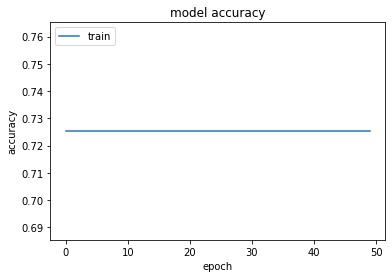

In [19]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

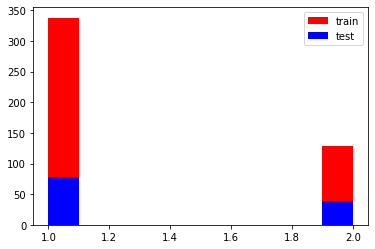

In [20]:
plt.hist(y_train, label="train", color="red")
plt.hist(y_test, label="test", color="blue")
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


from sklearn import metrics
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)




<h3>Logistic regression</h3>

In [26]:
import warnings
warnings.filterwarnings('ignore')

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
}

logistic_regression = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

logistic_regression.fit(X_train, y_train)
print(logistic_regression.best_params_)

y_pred_lr = logistic_regression.predict(X_test)

metrics.precision_score(y_test , logistic_regression.best_estimator_.predict(X_test))

{'classifier__C': 0.001, 'preprocessing': None}


0.8791208791208791

<h3>RandomForestClassifier</h3>

In [27]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [8, 16, 32, 64, 128],
            'classifier__max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

random_forest = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

random_forest.fit(X_train, y_train)
print(random_forest.best_params_)

y_pred_rf = random_forest.predict(X_test)

metrics.precision_score(y_test , random_forest.best_estimator_.predict(X_test))

{'classifier__max_leaf_nodes': 70, 'classifier__n_estimators': 8, 'preprocessing': StandardScaler()}


0.7655172413793103

SVM linear

In [28]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [1, 10, 100, 1000, 10000],
}

svm_linear = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

svm_linear.fit(X_train, y_train)
print(svm_linear.best_params_)

y_pred_svm = svm_linear.predict(X_test)

metrics.precision_score(y_test , svm_linear.best_estimator_.predict(X_test))

{'classifier__C': 10000, 'preprocessing': None}


0.8958333333333334

SVM poly

In [29]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [1, 10],
            'classifier__coef0': [0.001, 0.001, 0.01, 0.1, 1, 10],
            'classifier__degree': [1, 2, 3, 4, 5, 6],
}

svm_poly = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

svm_poly.fit(X_train, y_train)
print(svm_poly.best_params_)


y_pred_svm_poly = svm_poly.predict(X_test)

metrics.precision_score(y_test , svm_poly.best_estimator_.predict(X_test))

<h3>SVM rbf</h3>

In [ ]:

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.001, 0.01, 0.1, 1, 10],
            'classifier__gamma': [0.0001, 0.001, 0.001, 0.01, 0.1, 1, 10, 100],
}

svm_rbf = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

svm_rbf.fit(X_train, y_train)
print(svm_rbf.best_params_)

y_pred_svm_rbf = svm_rbf.predict(X_test)

metrics.precision_score(y_test , svm_rbf.best_estimator_.predict(X_test))

{'classifier__C': 1, 'classifier__gamma': 0.1, 'preprocessing': None}


0.6744186046511628

<h3>AdaBoost</h3>

In [ ]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [1, 2, 4, 8, 16],
            'classifier__learning_rate': [0.00001, 0.0001, 0.001, 0.01],
}

ada_boost = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

ada_boost.fit(X_train, y_train)
print(ada_boost.best_params_)

y_pred_ada_boost = ada_boost.predict(X_test)

metrics.precision_score(y_test , ada_boost.best_estimator_.predict(X_test))

{'classifier__learning_rate': 1e-05, 'classifier__n_estimators': 1, 'preprocessing': StandardScaler()}


0.6685714285714286

<h3>KNeighbors</h3>

In [ ]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_neighbors': [1, 2, 4],
            'classifier__p': [1, 2, 4],
}

k_neighbors = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

k_neighbors.fit(X_train, y_train)
print(k_neighbors.best_params_)

y_pred_k_neighbors = k_neighbors.predict(X_test)

metrics.precision_score(y_test , k_neighbors.best_estimator_.predict(X_test))

{'classifier__n_neighbors': 2, 'classifier__p': 2, 'preprocessing': StandardScaler()}


0.6987179487179487

<h3>Porównanie modeli</h3>

In [ ]:
from sklearn import metrics

models = []
models.append(('Logistic regression', logistic_regression.best_estimator_, y_pred_lr))
models.append(('RandomForest', random_forest.best_estimator_, y_pred_rf))
models.append(('SVM linear', svm_linear.best_estimator_, y_pred_svm))
models.append(('SVM poly', svm_poly.best_estimator_, y_pred_svm_poly))
models.append(('SVM rbf', svm_rbf.best_estimator_, y_pred_svm_rbf))
models.append(('AdaBoost', ada_boost.best_estimator_, y_pred_ada_boost))
models.append(('KNeighbors', k_neighbors.best_estimator_, y_pred_k_neighbors))


precision = []
recall = []
f1 = []
accuracy = []
roc_auc = []
for name, model, pred in models:
    if name == 'Keras':
        pred = [round(x[0]) for x in model.predict(X_test)]
    precision.append(metrics.precision_score(y_test, pred))
    recall.append(metrics.recall_score(y_test, pred))
    f1.append( metrics.f1_score(y_test, pred))
    accuracy.append(metrics.accuracy_score(y_test, pred)) 
    roc_auc.append(metrics.roc_auc_score(y_test, pred))

In [ ]:
d = {
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'accuracy' : accuracy,
    'roc_auc' : roc_auc
}
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Model', value=['Logistic regression', 'RandomForest', 'SVM linear', 'SVM poly', 'SVM rbf',
                                     'AdaBoost','KNeighbors'])
df

,Model,precision,recall,f1,accuracy,roc_auc
0,Logistic regression,0.860465,0.632479,0.729064,0.685714,0.712791
1,RandomForest,0.703226,0.931624,0.801471,0.691429,0.569260
2,SVM linear,0.851852,0.589744,0.696970,0.657143,0.691424
3,SVM poly,0.776699,0.683761,0.727273,0.657143,0.643604
4,SVM rbf,0.674419,0.991453,0.802768,0.674286,0.512968
5,AdaBoost,0.668571,1.000000,0.801370,0.668571,0.500000
6,KNeighbors,0.698718,0.931624,0.798535,0.685714,0.560640
